In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

Paso 2: Cargar el conjunto de datos MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 3: Preprocesar los datos

In [4]:
x_train = x_train.astype('float32') / 255  # Normalización

x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes

x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding

y_test = tf.keras.utils.to_categorical(y_test, 10)

# Paso 4: Definir el modelo MLP

In [5]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

# Paso 5: Compilar el modelo

In [6]:
model.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])


# Paso 6: Entrenar el modelo

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 12ms/step - loss: 0.3782 - accuracy: 0.9025 - val_loss: 0.1532 - val_accuracy: 0.9576
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1178 - accuracy: 0.9674 - val_loss: 0.1112 - val_accuracy: 0.9693
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0750 - accuracy: 0.9789 - val_loss: 0.0938 - val_accuracy: 0.9730
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0536 - accuracy: 0.9848 - val_loss: 0.0868 - val_accuracy: 0.9747
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0399 - accuracy: 0.9887 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.0869 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0910 - val_accuracy: 0.9755

# Paso 7: Evaluar el modelo

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Precisión en el conjunto de prueba: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9805
Precisión en el conjunto de prueba: 0.9804999828338623


# Paso 8: Probar el modelo con una imagen del conjunto de prueba

1/1 [==============================] - 0s 324ms/step


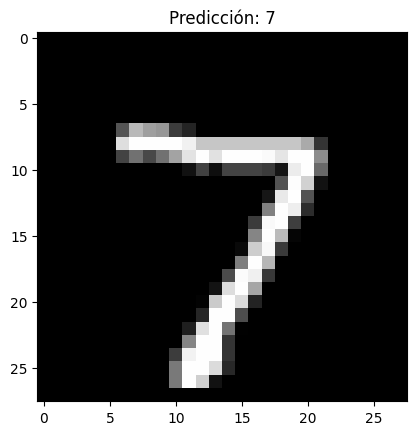

In [9]:
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen

prediccion = model.predict(imagen)

digit_predicho = np.argmax(prediccion)

# Mostrar la imagen y el dígito predicho

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')

plt.title(f'Predicción: {digit_predicho}')

plt.show()


# Paso 9: Probar el modelo con una imagen personalizada

In [10]:
#ruta_imagen="D:/talento tech/ia/imagen1.png"

def predecir_imagen_personalizada(ruta_imagen):

    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises

    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles

    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar

    prediccion = model.predict(img_array)  # Hacer la predicción

    digit_predicho = np.argmax(prediccion)

    print(f'Predicción para la imagen personalizada: {digit_predicho}')

    plt.imshow(img, cmap='gray')

    plt.title(f'Predicción: {digit_predicho}')

    plt.show()

# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)

predecir_imagen_personalizada('"D:\Inteligencia artifical\prueba 5.png"')

OSError: [Errno 22] Invalid argument: 'D:\\Inteligencia artifical\\taller1\\"D:\\Inteligencia artifical\\prueba 5.png"'

Procesando imágenes en la carpeta: D:/Inteligencia artifical/test2/
Archivo encontrado: 0.png
Procesando imagen: D:/Inteligencia artifical/test2/0.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción para 0.png: 0


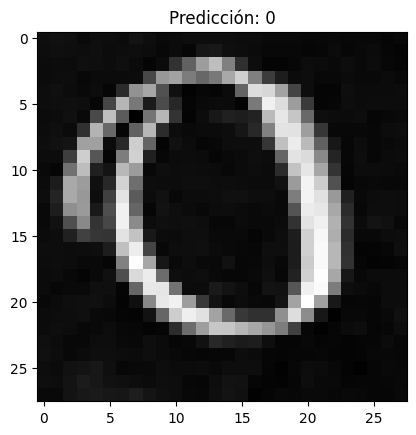

Archivo encontrado: 1.png
Procesando imagen: D:/Inteligencia artifical/test2/1.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción para 1.png: 0


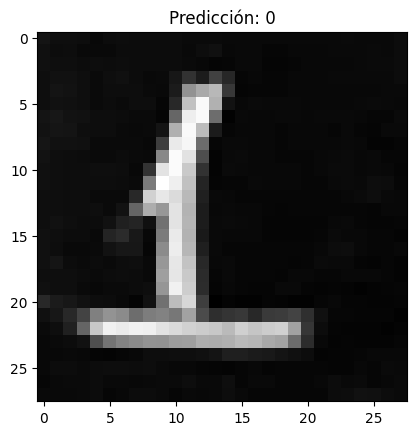

Archivo encontrado: 2.png
Procesando imagen: D:/Inteligencia artifical/test2/2.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicción para 2.png: 2


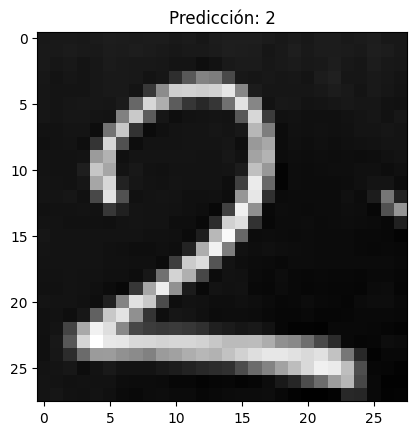

Archivo encontrado: 3.png
Procesando imagen: D:/Inteligencia artifical/test2/3.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicción para 3.png: 5


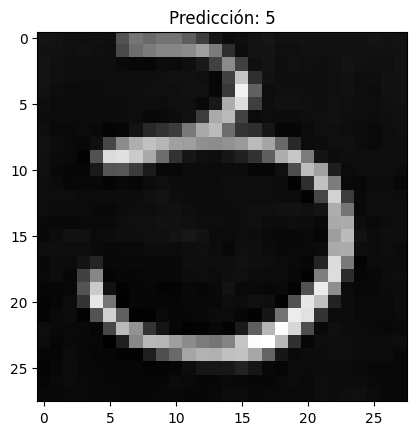

Archivo encontrado: 4.png
Procesando imagen: D:/Inteligencia artifical/test2/4.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicción para 4.png: 8


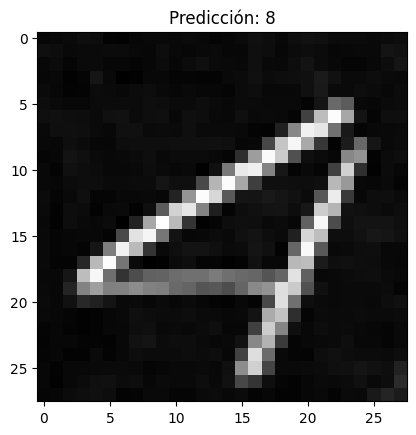

Archivo encontrado: 5.png
Procesando imagen: D:/Inteligencia artifical/test2/5.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/5.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicción para 5.png: 5


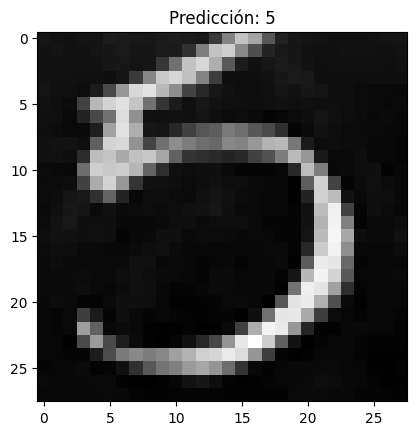

Archivo encontrado: 6.png
Procesando imagen: D:/Inteligencia artifical/test2/6.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/6.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicción para 6.png: 6


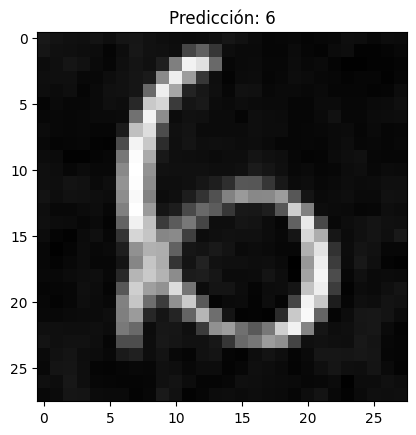

Archivo encontrado: 7.png
Procesando imagen: D:/Inteligencia artifical/test2/7.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción para 7.png: 2


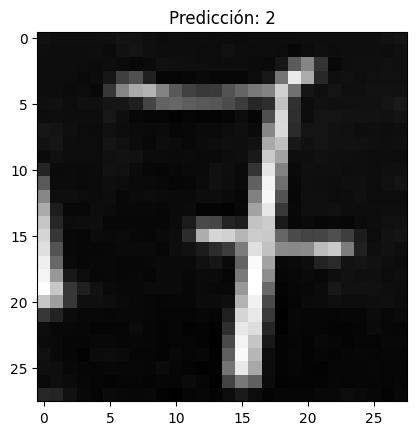

Archivo encontrado: 8.png
Procesando imagen: D:/Inteligencia artifical/test2/8.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/8.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Predicción para 8.png: 2


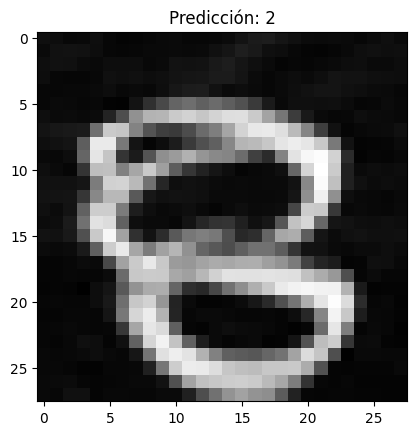

Archivo encontrado: 9.png
Procesando imagen: D:/Inteligencia artifical/test2/9.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/9.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicción para 9.png: 7


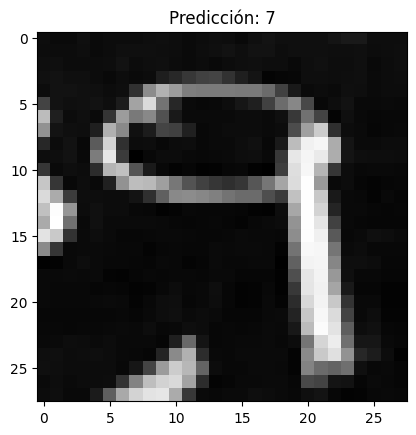

In [60]:
import os
def predecir_imagen_personalizada(ruta_imagen):
    try:
        print(f"Procesando imagen: {ruta_imagen}")  # Debug
        img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
        img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
        img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar

        print(f"Imagen procesada correctamente: {ruta_imagen}")  # Debug

        prediccion = model.predict(img_array)  # Hacer la predicción
        digit_predicho = np.argmax(prediccion)

        print(f'Predicción para {os.path.basename(ruta_imagen)}: {digit_predicho}')  # Imprimir resultado

        plt.imshow(img, cmap='gray')
        plt.title(f'Predicción: {digit_predicho}')
        plt.show()
    
    except Exception as e:
        print(f"Error procesando {ruta_imagen}: {e}")

# Función para iterar sobre todas las imágenes en una carpeta
def predecir_imagenes_en_carpeta(ruta_carpeta):
    print(f"Procesando imágenes en la carpeta: {ruta_carpeta}")
    
    archivos_encontrados = os.listdir(ruta_carpeta)  # Obtener la lista de archivos
    
    if len(archivos_encontrados) == 0:
        print(f"No se encontraron archivos en la carpeta: {ruta_carpeta}")
    
    for archivo in archivos_encontrados:
        print(f"Archivo encontrado: {archivo}")  # Imprimir cada archivo encontrado
        
        if archivo.endswith(('.png', '.jpg', '.jpeg')):  # Verificar si es una imagen
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            predecir_imagen_personalizada(ruta_imagen)
        else:
            print(f"{archivo} no es una imagen válida.")  # Archivos no válidos

# Ruta de la carpeta de imágenes de prueba
ruta_carpeta = 'D:/Inteligencia artifical/test2/'

# Ejecutar la predicción para todas las imágenes en la carpeta
predecir_imagenes_en_carpeta(ruta_carpeta)